# 1. <a id='Introduction'>Introduction 

![foto](https://theyellowcarcompany.com/wp-content/uploads/2019/04/The_Yellow_Car_Company_Sales_TYCC-930x550.jpg)

### The "Individual Company Sales" dataset is a very interesting example of how we can use a variety of customer information to predict the likelihood that he will buy a specific product or not. The product in question is generic so that our analysis can theoretically be applied to any product

### This dataset includes about 40,000 rows and 15 feature variables. Each row corresponds to a customer infomation, and includes the variables:

### 1. flag: Whether the customer has bought the target product or not

### 2. gender: Gender of the customer

### 3. education: Education background of customer

### 4. house_val: Value of the residence the customer lives in

### 5. age: Age of the customer by group

### 6. online: Whether the customer had online shopping experience or not

### 7. customer_psy: Variable describing consumer psychology based on the area of residence

### 8. marriage: Marriage status of the customer

### 9. children: Whether the customer has children or not

### 10. occupation: Career information of the customer

### 11. mortgage: Housing Loan Information of customers

### 12. house_own: Whether the customer owns a house or not

### 13. region: Information on the area in which the customer are located

### 14. car_prob: The probability that the customer will buy a new car(1 means the maximum possible）

### 15. fam_income: Family income Information of the customer(A means the lowest, and L means the highest)

# 2. <a id='importing'>Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
!pip install chart-studio
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import plotly.express as px
from plotly.offline import iplot
from matplotlib import rcParams

import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
%matplotlib inline

warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
from colorama import Fore, Back, Style 

# Import encoder library
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder 

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# 3. <a id='reading'>Reading the dataset.csv

In [3]:
# load data
df = pd.read_csv(r'C:\Users\rondi\OneDrive\Documentos\sales_data.csv')
df.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,1,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,3,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,1,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,2,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,7,H


In [4]:
print(Fore.BLUE + 'Data information ....................',Style.RESET_ALL)
print(df.info())

Data information .................... 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   flag          40000 non-null  object
 1   gender        40000 non-null  object
 2   education     39259 non-null  object
 3   house_val     40000 non-null  int64 
 4   age           40000 non-null  object
 5   online        40000 non-null  object
 6   customer_psy  40000 non-null  object
 7   marriage      25973 non-null  object
 8   child         40000 non-null  object
 9   occupation    40000 non-null  object
 10  mortgage      40000 non-null  object
 11  house_owner   36623 non-null  object
 12  region        40000 non-null  object
 13  car_prob      40000 non-null  int64 
 14  fam_income    40000 non-null  object
dtypes: int64(2), object(13)
memory usage: 4.6+ MB
None


In [5]:
for i in df.columns:
    print(i, df[i].unique())

flag ['Y' 'N']
gender ['M' 'F' 'U']
education ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]
house_val [756460 213171 111147 ... 120630 603554 213596]
age ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
online ['N' 'Y']
customer_psy ['B' 'E' 'C' 'J' 'A' 'G' 'F' 'I' 'D' 'H' 'U']
marriage [nan 'Single' 'Married']
child ['U' 'Y' 'N' '0']
occupation ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
mortgage ['1Low' '2Med' '3High']
house_owner [nan 'Owner' 'Renter']
region ['Midwest' 'Northeast' 'West' 'South' 'Rest']
car_prob [1 3 2 7 5 6 9 8 4 0]
fam_income ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']


# 4. <a id='basic'>Basic Data Exploration

In [7]:
df['gender'] = df.gender.replace('U', np.NaN)
df['age'] = df.age.replace('1_Unk', np.NaN)
df['child'] = df.child.replace('U', np.NaN)
df['child'] = df.child.replace('0', np.NaN)

In [8]:
# Fraction of missing values
df.isnull().sum() / df.shape[0] * 100

flag             0.0000
gender           2.8775
education        1.8525
house_val        0.0000
age             16.7725
online           0.0000
customer_psy     0.0000
marriage        35.0675
child           21.6375
occupation       0.0000
mortgage         0.0000
house_owner      8.4425
region           0.0000
car_prob         0.0000
fam_income       0.0000
dtype: float64

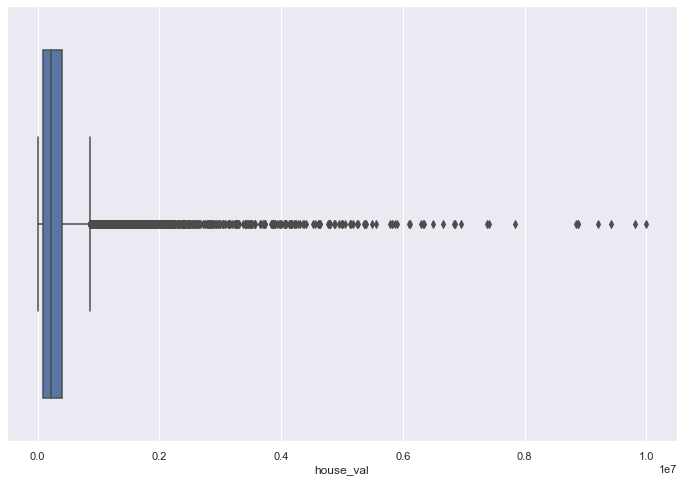

In [9]:
# Show the outliers in 'house_val'
plt.figure(figsize = (12, 8))
sns.boxplot(data= df, x = 'house_val')
plt.show()

### Using quantile method to eliminate outliers

In [10]:
# Applying the quantile method
hi_q1 = df['house_val'].quantile(.25)
hi_q3 =df['house_val'].quantile(.75)
iqr = hi_q3 - hi_q1

In [11]:
hi_up = hi_q3 + 1.5*iqr
hi_down = hi_q1 - 1.5*iqr

In [12]:
df0 = df[(df['house_val']> hi_down) & (df['house_val'] < hi_up)]

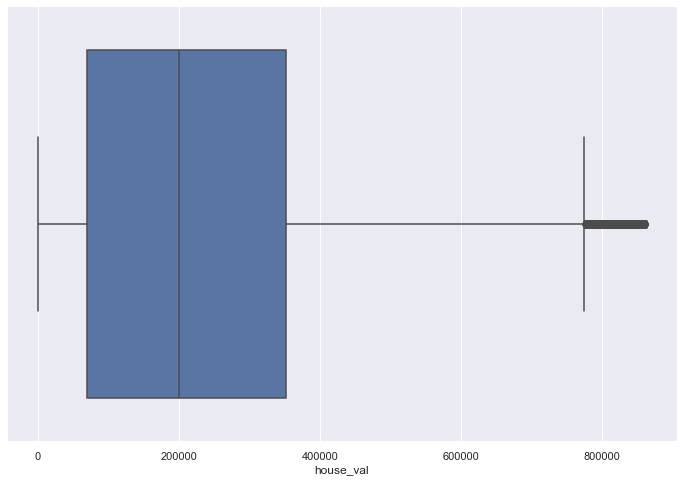

In [13]:
# Show 'house_val' without outliers
plt.figure(figsize=(12,8))
sns.boxplot(data= df0, x = 'house_val')
plt.show()

In [14]:
# Assigning new dataset for encoder
dff = df0

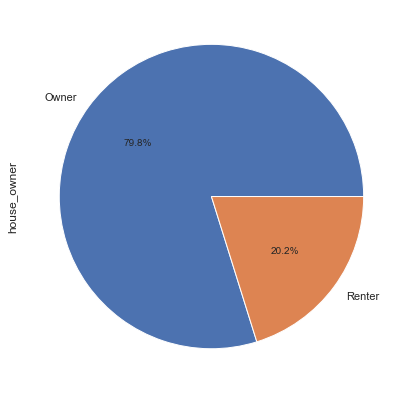

In [15]:
# Pie plot of house owner
plt.figure(figsize =(7, 7))
df['house_owner'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

[](http://)

In [16]:
# Percentage of null values in house owner
(df.isnull().sum() / df.shape[0] * 100)['house_owner']

8.4425

### The most house owner are owner, than we can fill missing values with house owner attribute

In [17]:
dff['house_owner'] = dff['house_owner'].fillna(df.mode()['house_owner'][0])

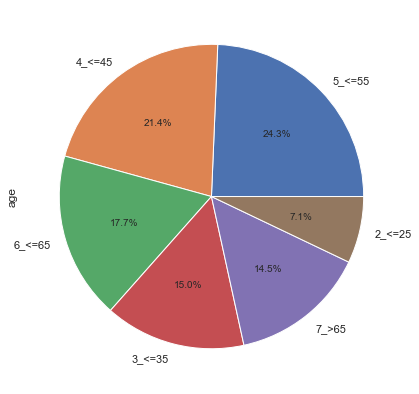

In [18]:
# Pie plot of age
plt.figure(figsize =(7, 7))
df['age'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [19]:
# Percentage of null values in age
(df.isnull().sum() / df.shape[0] * 100)['age']

16.7725

In [20]:
dff = dff.dropna(subset=['age'])

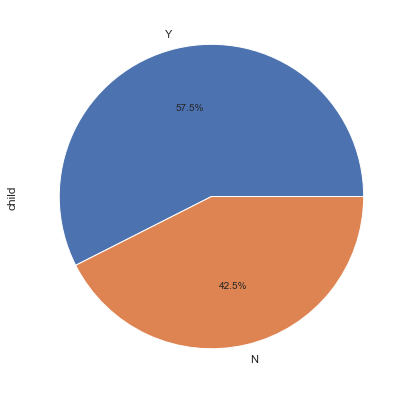

In [21]:
# Pie plot of child
plt.figure(figsize =(7, 7))
df['child'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [22]:
# Percentage of null values in child
(df.isnull().sum() / df.shape[0] * 100)['child']

21.637500000000003

### We don't have dominant categories in 'child', then we can´t fill the missing values. therefore, it is reasonable to disregard the 'child' column.

In [23]:
dff = dff.drop('child', axis=1)

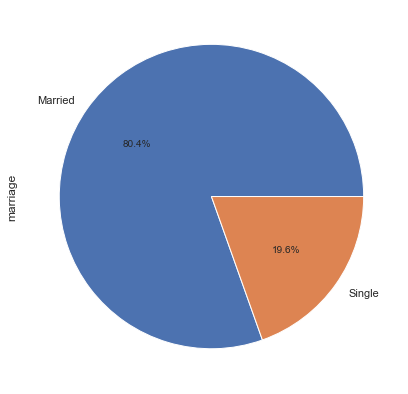

In [24]:
# Pie plot marriage
plt.figure(figsize =(7, 7))
df['marriage'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [25]:
# Percentage of null values in marriage
(df.isnull().sum() / df.shape[0] * 100)['marriage']

35.0675

### More than 80% marriage are marriage, then we can fill missing values with marriage attribute

In [26]:
dff['marriage'] = dff['marriage'].fillna(dff.mode()['marriage'][0])

In [ ]:
# Pie plot gender
plt.figure(figsize =(7, 7))
df['gender'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [27]:
# Percentage of null values in gender
(df.isnull().sum() / df.shape[0] * 100)['gender']

2.8775

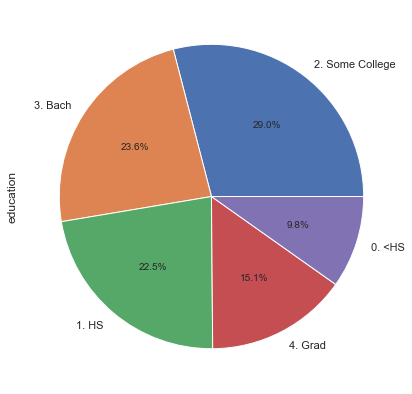

In [28]:
# Pie plot education
plt.figure(figsize =(7, 7))
df['education'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [29]:
# Percentage of null values in education
(df.isnull().sum() / df.shape[0] * 100)['education']

1.8525

### Since we have small amounts of missing values in the 'education' and 'gender' columns, then we simply drop them.

In [30]:
dff = dff.dropna(subset=['gender', 'education'])

In [31]:
# checking data cleaning
dff.isnull().sum()

flag            0
gender          0
education       0
house_val       0
age             0
online          0
customer_psy    0
marriage        0
occupation      0
mortgage        0
house_owner     0
region          0
car_prob        0
fam_income      0
dtype: int64

### No more missing values

# 5. <a id='details'>Feature Engineering of dataset columns

### We started converting the data set columns that are of the object type into numeric values

In [32]:
dff.dtypes

flag            object
gender          object
education       object
house_val        int64
age             object
online          object
customer_psy    object
marriage        object
occupation      object
mortgage        object
house_owner     object
region          object
car_prob         int64
fam_income      object
dtype: object

### Firts coverting  the hierarchy  columns 

In [33]:
# Converting flag and online features to binary integer
dff['flag'] = dff['flag'].apply(lambda value: 1 if value == 'Y' else 0)
dff['online'] = dff['online'].apply(lambda value: 1 if value == 'Y' else 0)

In [34]:
# Converting education to integer
dff['education'] = dff['education'].apply(lambda value: int(value[0]) + 1 )

In [35]:
# Converting age to integer
dff['age'] = dff['age'].apply(lambda value: int(value[0]) - 1 )

In [36]:
# Converting mortgage to integer
dff['mortgage'] = dff['mortgage'].apply(lambda value: int(value[0]))

In [37]:
#fam_income label dictionary
dict_fam_income_label = {}
for i, char in enumerate(sorted(dff['fam_income'].unique().tolist())):
    dict_fam_income_label[char] = i + 1

In [38]:
dff['fam_income'] = dff['fam_income'].apply(lambda value: dict_fam_income_label[value])

### Now, we deal of the columns with dummy variables

In [39]:
dummy_features = ['gender', 'customer_psy', 'occupation', 'house_owner', 'region', 'marriage']

In [40]:
def apply_dummy(dff, i, drop_first=True):


    return pd.concat([dff, pd.get_dummies(dff[i], prefix=i, drop_first=drop_first)], axis=1).drop(i, axis=1)

In [41]:
# Converting dummy features in numerical values
for i in dummy_features:
    dff = apply_dummy(dff, i)

In [42]:
dff.head()

,flag,education,house_val,age,online,mortgage,car_prob,fam_income,gender_M,customer_psy_B,...,occupation_Others,occupation_Professional,occupation_Retired,occupation_Sales/Service,house_owner_Renter,region_Northeast,region_Rest,region_South,region_West,marriage_Single
1,0,4,213171,6,0,1,3,7,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,3,111147,1,1,1,1,10,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,3,354151,1,1,1,2,12,1,1,...,0,0,0,1,0,0,0,0,1,1
5,1,4,248694,5,1,2,1,7,0,1,...,0,1,0,0,0,0,0,0,1,0
7,0,4,416925,4,1,1,2,9,0,0,...,0,1,0,0,0,0,0,1,0,0


In [43]:
dff.dtypes

flag                        int64
education                   int64
house_val                   int64
age                         int64
online                      int64
mortgage                    int64
car_prob                    int64
fam_income                  int64
gender_M                    uint8
customer_psy_B              uint8
customer_psy_C              uint8
customer_psy_D              uint8
customer_psy_E              uint8
customer_psy_F              uint8
customer_psy_G              uint8
customer_psy_H              uint8
customer_psy_I              uint8
customer_psy_J              uint8
customer_psy_U              uint8
occupation_Farm             uint8
occupation_Others           uint8
occupation_Professional     uint8
occupation_Retired          uint8
occupation_Sales/Service    uint8
house_owner_Renter          uint8
region_Northeast            uint8
region_Rest                 uint8
region_South                uint8
region_West                 uint8
marriage_Singl

### All columns contain numerical values, but note that we have many more columns now, it is a price that we have to pay

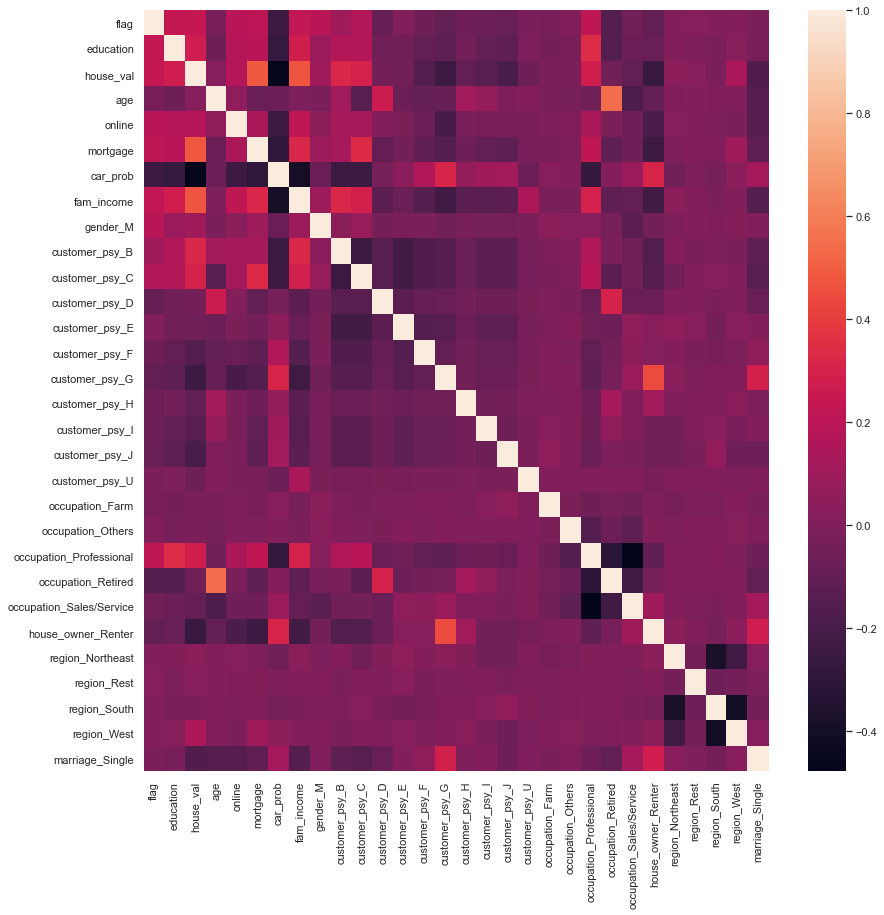

In [44]:
# Heatmap of correlation
plt.figure(figsize=(14,14))
sns.heatmap(dff.corr())
plt.show()

###  Looking the heatmap of correlation we can see the most variables exhibit low positive and negative correlation. Remembering tha positive correlation can be definide like: if the value of one of the variables increases, the value of the other variable increases as well. In case negative correlation the value of one variable decreases with the other’s increasing and vice-versa.

# 6. <a id='details'> Using machine learning to predict heart disease

In [45]:
#Splitting the dataset into features and target
y0 = dff["flag"]
x0 = dff.drop("flag", axis = 1)

In [46]:
#Splitting the data into test data and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x0, y0, test_size = 0.3)


In [47]:
accuracy_list = []

In [48]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = dt_clf.score(x_test,y_test)
accuracy_list.append(100*dt_acc)

In [49]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  66.87%


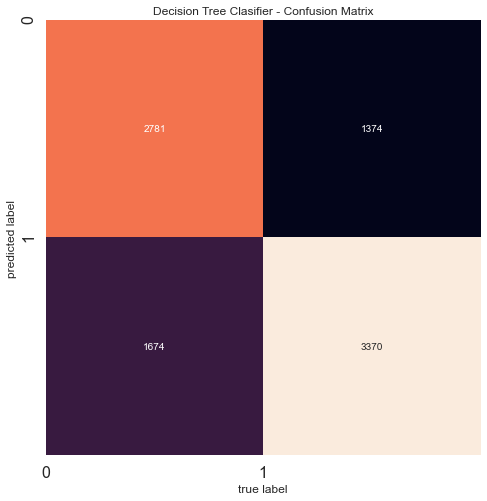

In [50]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (8, 8))
mat = confusion_matrix(y_test, dt_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt="d", cbar = False)
plt.title("Decision Tree Clasifier - Confusion Matrix")
plt.xticks(range(2), ["0","1"], fontsize=16)
plt.yticks(range(2), ["0","1"], fontsize=16)
plt.xlabel("true label")
plt.ylabel("predicted label");

In [51]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = kn_clf.score(x_test,y_test)
accuracy_list.append(100*kn_acc)


In [52]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  56.96%


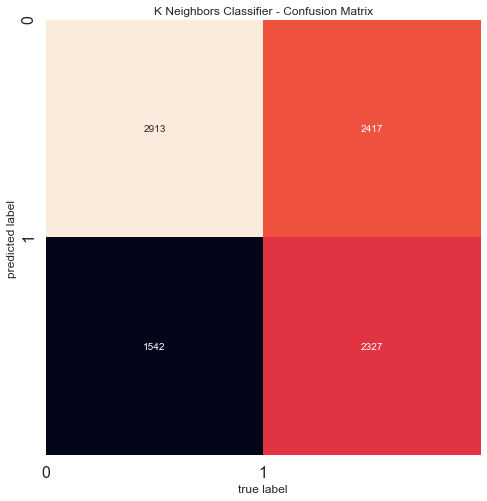

In [53]:
# Confusion matrix of  K Neighbors Classifier
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (8, 8))
mat = confusion_matrix(y_test, kn_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt="d", cbar = False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.title("K Neighbors Classifier - Confusion Matrix")
plt.xticks(range(2), ["0","1"], fontsize=16)
plt.yticks(range(2), ["0","1"], fontsize=16);

In [54]:
# RandomForestClassifier
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = r_clf.score(x_test,y_test)
accuracy_list.append(100*r_acc)

In [56]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  67.96%


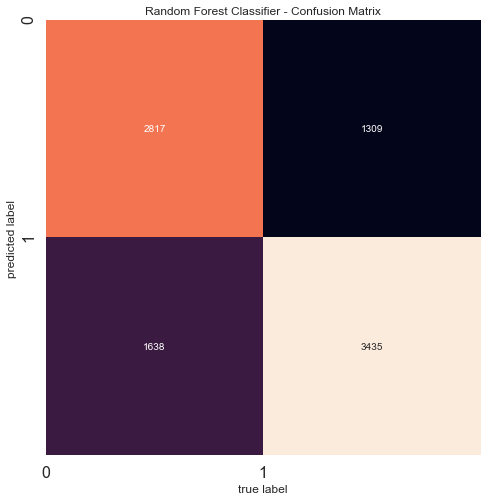

In [57]:
# Confusion matrix of Random Forest Classifier 
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (8, 8))
mat = confusion_matrix(y_test, r_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt="d", cbar = False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.title("Random Forest Classifier - Confusion Matrix")
plt.xticks(range(2), ["0","1"], fontsize=16)
plt.yticks(range(2), ["0","1"], fontsize=16);

In [58]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=4)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = gradientboost_clf.score(x_test,y_test)
accuracy_list.append(100*gradientboost_acc)

In [59]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  69.05%


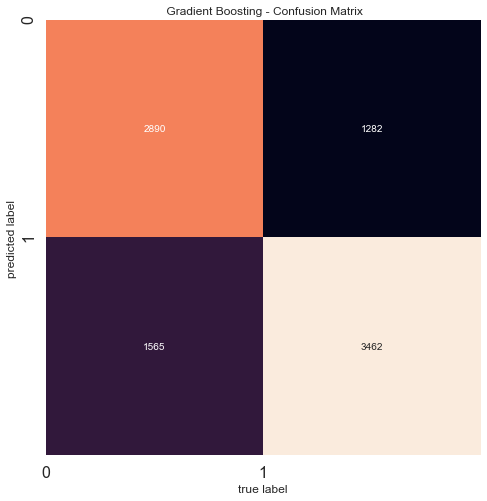

In [60]:
# Confusion matrix of Gradient Boosting
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (8, 8))
mat = confusion_matrix(y_test, gradientboost_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt="d", cbar = False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.title(" Gradient Boosting - Confusion Matrix")
plt.xticks(range(2), ["0","1"], fontsize=16)
plt.yticks(range(2), ["0","1"], fontsize=16);

In [61]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gaussian_pred = gaussian.predict(x_test)
gaussian_acc = gaussian.score(x_test,y_test)
accuracy_list.append(100*gaussian_acc)

In [62]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gaussian_acc))

Accuracy of Gradient Boosting is :  62.42%


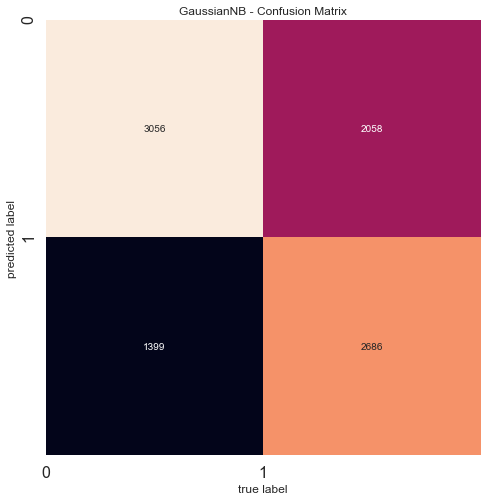

In [63]:
# Confusion matrix of GaussianNB
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (8, 8))
mat = confusion_matrix(y_test, gaussian_pred)
sns.heatmap(mat.T, square=True, annot=True,fmt="d", cbar = False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.title("GaussianNB - Confusion Matrix")
plt.xticks(range(2), ["0","1"], fontsize=16)
plt.yticks(range(2), ["0","1"], fontsize=16);

In [65]:
model_list = ['DecisionTree', 'KNearestNeighbours', 'RandomForest', 'GradientBooster', 'GaussianNB']

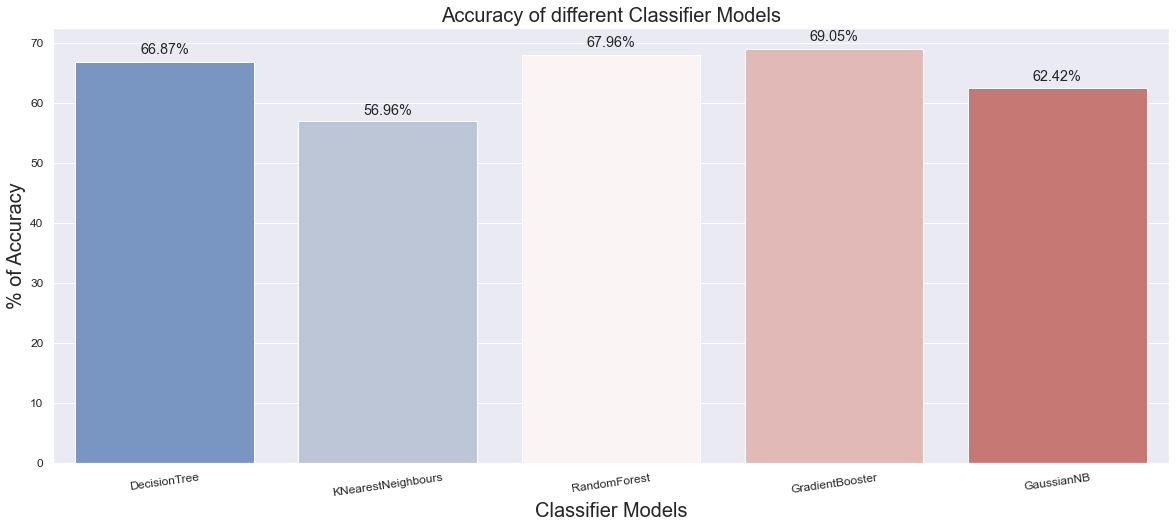

In [66]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "vlag", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### We use five machine learning algorithms to predict whether a customer is likely to buy a particular product or not based on various information about them. The best performing algorithms were GradientBooster and RandomForest with efficiency around 69%. Since the target variable represents a generic product so that we can apply our predictive models to any particular product we want to analyze. As the positive and negative correlations between the variables are not very large, it directly implies the model's prediction efficiency. We can conclude that depending on the correlations, we can obtain great prediction efficiency with the machine learning models.